# Breast Cancer Dataset Overview

This repo holds an EDA notebook and sampled images from the Curated Breast Imaging Subset of the Digital Database for Screening Mammography (CBIS-DDSM). The notebook details the structure of the downloaded repository from: https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM#5e40bd1f79d64f04b40cac57ceca9272



# Directory structure
## After downloading the directory from the website, these are the following items:

|--CBIS-DDSM: directory where all images are stored (see below)

├── CBIS-DDSM-All-doiJNLP-zzWs5zfZ.tcia: the file used with the NBIA Data Retriever App that downloads images and csv files

├── calc_case_description_test_set.csv: gives metadata/information about each patient and their subsequent images for the calcification abnormality-type for the test set

├── calc_case_description_train_set.csv: gives metadata/information about each patient and their subsequent images for the calcification abnormality-type for the train set

├── mass_case_description_test_set.csv: gives metadata/information about each patient and their subsequent images for the mass abnormality-type for the test set

└── mass_case_description_train_set\ (1).csv: gives metadata/information about each patient and their subsequent images for the mas abnormality-type for the train set.


Here is some statistics of the data in general:

Some Overall Statistics:

Collection Statistics | #
------------ | -------------
Number of Studies | 6775
Number of Series | 6775
Number of Patients | 1566*
Number of Images | 10239
Modalities | MG 
Image Size (GB) | 163.6
*: __Note__: The image data for this collection is structured such that each patient has multiple patient IDs.  For example, patient 00038 has 10 separate patient IDs which provide information about the scans within the IDs (e.g. Calc-Test_P_00038_LEFT_CC, Calc-Test_P_00038_RIGHT_CC_1)  This makes it appear as though there are 6,671 patients according to the DICOM metadata, but there are only 1,566 actual patients in the cohort

Below, we'll briefly look at the directory containing images to get a feel of what is listed.

In [1]:
import numpy as np
import pandas as pd
import pydicom
import os
import pathlib
import matplotlib.pyplot as plt
from glob import glob
 

In [2]:
calc_test_filepath = "calc_case_description_test_set_copy.csv"
calc_test = pd.read_csv(calc_test_filepath)
calc_test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

In [3]:
#For the nontrivial columns, here's a quick look at each's categories
for col in calc_test.columns[1:11]:
    print()
    print(str(col).upper())
    print('-' *60)
    print(calc_test[col].value_counts())
    print("-" * 60)



BREAST DENSITY
------------------------------------------------------------
3    115
2    115
4     70
1     24
0      2
Name: breast density, dtype: int64
------------------------------------------------------------

LEFT OR RIGHT BREAST
------------------------------------------------------------
LEFT     184
RIGHT    142
Name: left or right breast, dtype: int64
------------------------------------------------------------

IMAGE VIEW
------------------------------------------------------------
MLO    177
CC     149
Name: image view, dtype: int64
------------------------------------------------------------

ABNORMALITY ID
------------------------------------------------------------
1    269
2     48
3      6
4      2
5      1
Name: abnormality id, dtype: int64
------------------------------------------------------------

ABNORMALITY TYPE
------------------------------------------------------------
calcification    326
Name: abnormality type, dtype: int64
-----------------------------

### Here is a brief description of features in the csv files.

Note that there is some overlap since some cases contain both calcifications and masses. Metadata for each abnormality is included as an associated CSV file containing the following:

- Patient ID: the first 7 characters of images in the case file

- Density category

- Breast: Left or Right

- View: CC or MLO (craniocaudal (CC) and/or mediolateral oblique (MLO))

- Number of abnormality for the image (This is necessary as there are some cases containing multiple abnormalities.

- Mass shape (when applicable)

- Mass margin (when applicable)

- Calcification type (when applicable)

- Calcification distribution (when applicable)

- BI-RADS assessment

- Pathology: Benign, Benign without call-back, or Malignant

- Subtlety rating: Radiologists’ rating of difficulty in viewing the abnormality in the image

- Path to image files

Source: Lee, R. S. et al. A curated mammography data set for use in computer-aided detection and diagnosis research. Sci. Data 4:170177 doi: 10.1038/sdata.2017.177 (2017).

# Investigating files structure

### The paths to the images are sepearted into multiple folders. Each patient can have multiple images, so each patient can have multiple folders as well. Below is an example for one particular patient: P_00005. 

REMEMBER: one individual can have multiple images. Below is a sample list of files dedicated to one patient: P_00005.
For a particular image file, the file name and path follows this structure:

examples:
- /CBIS-DDSM/Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM-23157/1-full mammogram images-38548/00000.dcm
- /CBIS-DDSM/Calc-Training_P_00005_RIGHT_CC_1/08-30-2017-DDSM-09081/1-cropped images-94682/00000.dcm
- /CBIS-DDSM/Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDSM-33338/1-full mammogram images-96727/00000.dcm
- /CBIS-DDSM/Calc-Training_P_00005_RIGHT_MLO_1/09-06-2017-DDSM-81938/1-ROI mask images-22894/00001.dcm

The structure of the 4 directories, plus the actual file, is as follows:

/name of database/  abnormality type, train or test set, patient ID, right or left breast, the type of image view/  date, (unkown)/ the type of image

 1. The name of the "Database"; the Curated Breast Imaging Subset of the Digital Database for Screening Mammography (CBIS-DDSM). All images are held here
 2. The abnormality type, followed by the train/test set, followed by the patient ID, follwed by the right/left breast indicator, followed by the type of image view
 3. The date, followed by (unknown)
 4. They type of image
 5. Finally, the file name, which indicates which number picture in the last folder. 

__Technically, the second element in the path is one individual patient ID. So patient P_00005 has at least 4 different patient ID's with info about the scan within the "patient ID".__ 

To get a better understanding, looking at the first listing, the information is:

- CBIS-DDSM: folder where all images are held
- Calc: the 'abnormality type'. There are "2" main types: Mass and Calc (calcification)
- Training: which train/test fold it belongs to
- P_00005: The individual Patient ID. 
- RIGHT: designates left or right breast
- CC: the Image view. Options are craniocaudal (CC) and/or mediolateral oblique (MLO)
- 09-07-2016: the date of the image
- DDSM-23157: Not exactly sure what this implies exactly
- 1-full mammogram images-38548: Indicates this is the full image. The creators of the database included cropped images as well as ROI segmentation & bounding boxes images; see the 2nd and last example 



# Statistics Overview

Digital Database for Screening Mammography (CBIS-DDSM) 

2620 scanned film mammography studies

Structure of image data: 
- 1566 patients in the cohort
- each patient has multiple IDS occurances, so it may appear as though there are 6671 patients, but remember from above
- 80/20 split for training/testing data (See below for more details)

### Below shows the BI-RADs assesments and value counts for Benign and Malignant for both Mass and Calcification Cases
#### (If it doesn't show, open the 'Train_Test_Stats.webp' file) 

![alt text] (Train_Test_Stats.webp)

"Mass and calcification cases were split into training and test sets based on BI-RADS assessment. (a) Histogram of BIRADS for each abnormality in training and test sets with calcifications, (b) Histogram of benign and malignant cases for training and test sets with calcifications, (c) Histogram of BIRADS for each abnormality in training and test sets with masses, (d) Histogram of benign and malignant cases for training and test sets with masses."

image citation: https://www.nature.com/articles/sdata2017177

Overall, for each dataset, the number of cases is as follows:

Dataset | Benign Cases | Malignant Cases
------------ | -------------  | ------------ 
Calcification Training Set | 329 cases (552 abnormalities) | 273 cases (304 abnormalities)
Calcification Test Set | 85 Cases (112 abnormalities) | 66 cases (77 abnormalities)
Mass Training Set | 355 cases (387 abnormalities) | 336 cases (361 abnormalities)
Mass Test Set | 117 cases (135 abnormalities) | 83 cases (87 abnormalities)







## Display an Image

We'll visualize images containing to one patient, P_000005, and look a(n): 

1. full image CC type
2. cropped image of #1
3. full image of MLO type
4. ROI-mask version of #3

First, I just want to briefly describe a DICOM file format, just in case you're not familiar with them. A DICOM data object has different attributes as well as the actual image; the metadata is things like patient name, ID, date, sex, etc. The actual image data is housed under the attribute 'PixelData'. Depending on the study, this data can be a single image, but it can also be multiple "frames", or slices, that can be combined together, which allows for 3D representation. I believe in this dataset, there is only one image within in .dcm file, which we show below. I'm working on understanding how to manipulate/play with the images. 


In [4]:
#get an example image to show all metadata associated with the file

file = 'images/CC_000000.dcm'
image = pydicom.dcmread(file)

#show what attributes belong to the image
print(image)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.378776769711002686209961163603436313519
(0008, 0020) Study Date                          DA: '20160807'
(0008, 0023) Content Date                        DA: '20160503'
(0008, 0030) Study Time                          TM: '161037'
(0008, 0033) Content Time                        TM: '105435.478000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'full mammogram images'
(0010, 0010) Patient's Name                      PN: 'Calc-Training_P_00005_RIGHT_CC'
(0010, 0020) Patient ID                          LO: 'Calc-Training_P_00005_RIGH

In [5]:
#build a helper function to visualize an image

def display_image(path):

    filename = path
    dataset = pydicom.dcmread(filename)

    # Normal mode:
    print()
    print("Filename.........:", filename)
    print("Storage type.....:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name...:", display_name)
    print("Patient id.......:", dataset.PatientID)
    print("Modality.........:", dataset.Modality)
    print("Study Date.......:", dataset.StudyDate)

    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

    # use .get() if not sure the item exists, and want a default value if missing
    print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

    # plot the image using matplotlib
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()


Filename.........: images/CC_000000.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name...: Calc-Training_P_00005_RIGHT_CC, 
Patient id.......: Calc-Training_P_00005_RIGHT_CC
Modality.........: MG
Study Date.......: 20160807
Image size.......: 5056 x 2761, 27919232 bytes
Slice location...: (missing)


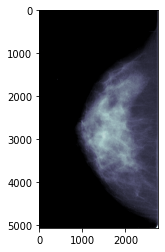

In [6]:
#show a full mammogram image

display_image('images/CC_000000.dcm')


Filename.........: images/CC_1000001.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name...: Calc-Training_P_00005_RIGHT_CC_1, 
Patient id.......: Calc-Training_P_00005_RIGHT_CC_1
Modality.........: MG
Study Date.......: 20170830
Image size.......: 589 x 677, 797506 bytes
Slice location...: (missing)


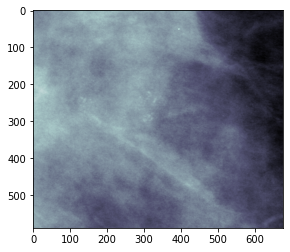

In [7]:
#show a cropped version 

display_image('images/CC_1000001.dcm')


Filename.........: images/CC_1000000.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name...: Calc-Training_P_00005_RIGHT_CC_1, 
Patient id.......: Calc-Training_P_00005_RIGHT_CC_1
Modality.........: MG
Study Date.......: 20170906
Image size.......: 5056 x 2761, 13959616 bytes
Slice location...: (missing)


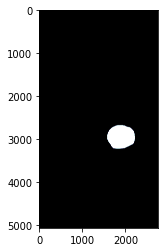

In [8]:
#show second image associated with "cropped image" folder
#I'm unsure what this image is

display_image('images/CC_1000000.dcm')


Filename.........: images/MLO_000000.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name...: Calc-Training_P_00005_RIGHT_MLO, 
Patient id.......: Calc-Training_P_00005_RIGHT_MLO
Modality.........: MG
Study Date.......: 20160807
Image size.......: 5386 x 2836, 30549392 bytes
Slice location...: (missing)


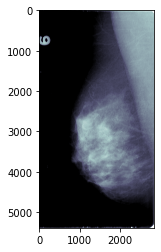

In [9]:
#show an MLO view image
display_image('images/MLO_000000.dcm')


Filename.........: images/MLO_1000000.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name...: Calc-Training_P_00005_RIGHT_MLO_1, 
Patient id.......: Calc-Training_P_00005_RIGHT_MLO_1
Modality.........: MG
Study Date.......: 20170830
Image size.......: 549 x 681, 747738 bytes
Slice location...: (missing)


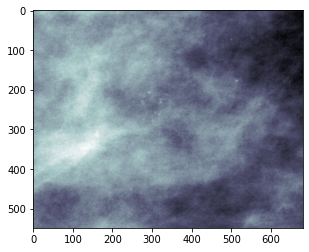

In [10]:
#show cropped image of MLO version above

display_image('images/MLO_1000000.dcm')

# Overall

This is a pretty decent dataset. We have to keep in mind that there is 1566 total patients, and for each type of image (full, cropped, ROI), each patient only has roughly one of each.  So in a sense, if we want to be consistent with the type of image used, we would have a total of approximately 1566 images. This is one of the bigger datsets I initially found, but I will continue to look for more. 